In [40]:
from datasets import load_dataset, DownloadConfig

In [3]:
import pyarrow as pa
import pandas as pd

In [42]:
# If the dataset is gated/private, make sure you have run huggingface-cli login
# Create proper DownloadConfig object
download_config = DownloadConfig(
    max_retries=3,
    num_proc=4  # parallel downloads
)

dataset = load_dataset(
    "shainar/BEAD", 'Full_Annotations', 
    download_config=download_config
)


0-Full Annotations/Full.csv:   0%|          | 0.00/1.03G [00:00<?, ?B/s]

Generating full split: 0 examples [00:00, ? examples/s]

In [43]:
dataset

DatasetDict({
    full: Dataset({
        features: ['text', 'dimension', 'biased_words', 'aspect', 'label', 'sentiment', 'toxic', 'identity_mention'],
        num_rows: 3674927
    })
})

In [51]:
dataset_split = dataset['full'].train_test_split(test_size=0.2, seed=42)
train_df = dataset_split['train'].to_pandas()
test_df = dataset_split['test'].to_pandas()

In [52]:
train_df

,text,dimension,biased_words,aspect,label,sentiment,toxic,identity_mention
0,http://twitpic.com/6996z - Todays is Katie's b...,Ageism and sentiment,[],Body-shaming,Neutral,Neutral,0.0,gender male
1,"""Rolling Stone"" called Trudeau ""The North Star...",toxicity,[],Nation stereotype,Neutral,Neutral,0.0,NO
2,@somesheep now we still lose lots of energy on...,Ageism and sentiment,[],Political,Slightly Biased,Negative,0.0,NO
3,Awesome - Thank you for the good work you do...,toxicity,[],Confirmation,Neutral,Positive,0.0,NO
4,Goodnight ppl i have work at 8 only a coupl h...,Ageism and sentiment,[],Hobby,Neutral,Neutral,0.0,NO
...,...,...,...,...,...,...,...,...
2939936,My internet won't connect,Ageism and sentiment,[],Professional,Neutral,Neutral,0.0,NO
2939937,@ElephantQueen25 you mean the Green ranger who...,Ageism and sentiment,['white power'],Racial,Slightly Biased,Positive,0.0,ethnicity white
2939938,What do you mean by that? Are you suggesting t...,toxicity,"['so mean', 'rejected']",Personality,Slightly Biased,Positive,0.0,gender female
2939939,@sexygeena Hey Thanks for the follow.,Ageism and sentiment,[],Confirmation,Neutral,Positive,0.0,NO


In [53]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2939941 entries, 0 to 2939940
Data columns (total 8 columns):
 #   Column            Dtype  
---  ------            -----  
 0   text              object 
 1   dimension         object 
 2   biased_words      object 
 3   aspect            object 
 4   label             object 
 5   sentiment         object 
 6   toxic             float64
 7   identity_mention  object 
dtypes: float64(1), object(7)
memory usage: 179.4+ MB


In [54]:
# Describe the categorical data
train_df.describe(include='object')

,text,dimension,biased_words,aspect,label,sentiment,identity_mention
count,2939939,2939941,2939941,2797642,2939941,2939941,2939941
unique,2939847,6,345446,39,3,3,10
top,#NAME?,toxicity,[],Confirmation,Neutral,Positive,NO
freq,33,1671851,1959783,327248,1508896,1343141,2570957


In [55]:
# Describe the numerical data
train_df.describe()

,toxic
count,2.939941e+06
mean,3.337203e-01
std,4.715412e-01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,1.000000e+00
max,1.000000e+00


In [56]:
# Check for missing values
train_df.isnull().sum()

text                     2
dimension                0
biased_words             0
aspect              142299
label                    0
sentiment                0
toxic                    0
identity_mention         0
dtype: int64

In [57]:
# Remove data with missing text
train_df = train_df.dropna(subset=['text'])

In [58]:
train_df.isnull().sum()

text                     0
dimension                0
biased_words             0
aspect              142298
label                    0
sentiment                0
toxic                    0
identity_mention         0
dtype: int64

<Axes: xlabel='dimension'>

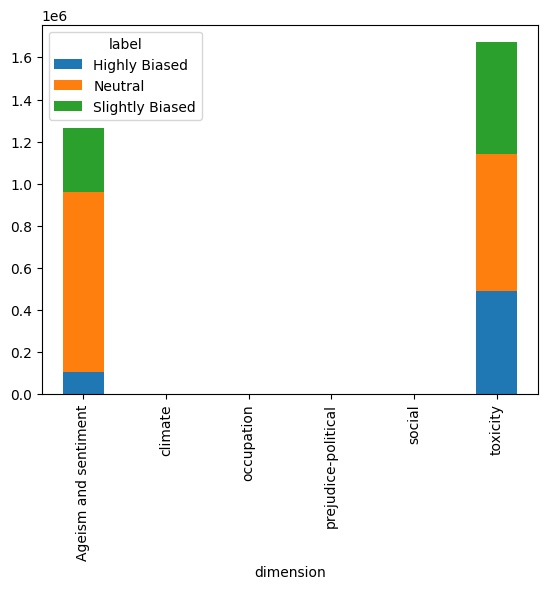

In [60]:
# Check distribution of label column based on dimension column
# plot the distribution of label column based on dimension column
train_df.groupby(['dimension', 'label']).size().unstack().plot(kind='bar', stacked=True)

In [61]:
len(train_df[train_df['dimension'].isin(['climate', 'occupation', 'prejudice-political', 'social'])].drop_duplicates())

3733

<Axes: xlabel='dimension'>

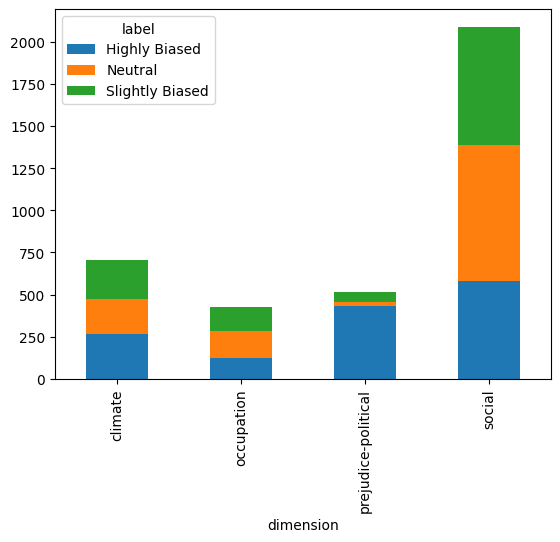

In [62]:
train_df[train_df['dimension'].isin(['climate', 'occupation', 'prejudice-political', 'social'])].groupby(['dimension', 'label']).size().unstack().plot(kind='bar', stacked=True)

In [63]:
# Since the number of samples in the dimensions climate, occupation, prejudice-political, and social are very low, we will remove them from the dataset
train_df = train_df[~train_df['dimension'].isin(['climate', 'occupation', 'prejudice-political', 'social'])]

In [65]:
# Removing the samples with these dimensions from the test data as well
test_df = test_df[~test_df['dimension'].isin(['climate', 'occupation', 'prejudice-political', 'social'])]

<Axes: xlabel='sentiment'>

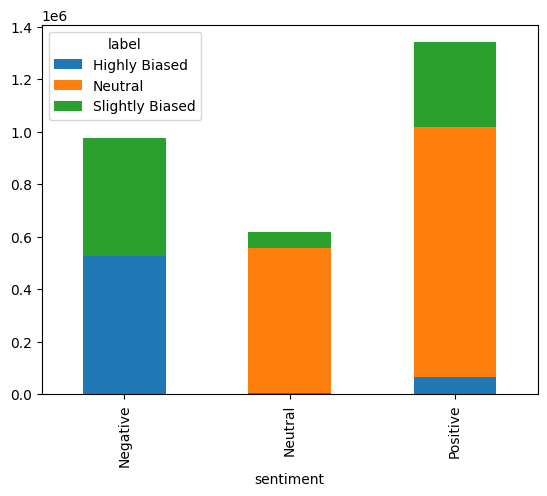

In [66]:
# Check the distribution of label column based on sentiment column
train_df.groupby(['sentiment', 'label']).size().unstack().plot(kind='bar', stacked=True)

<Axes: xlabel='aspect'>

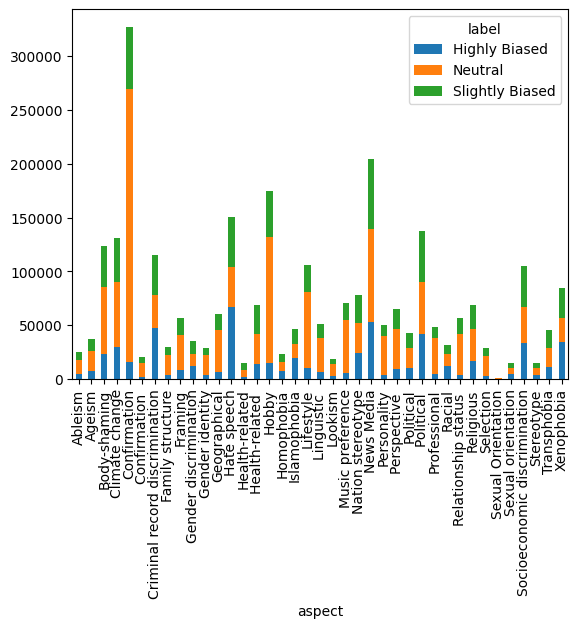

In [67]:
# Check the distribution of label column based on aspect column
train_df.groupby(['aspect', 'label']).size().unstack().plot(kind='bar', stacked=True)